## **OCR with Pytesseract and OpenCV**


In [40]:
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.


In [41]:
# Mount Google Drive to the working directory of Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
im1 = '/content/drive/MyDrive/Colab Notebooks/CVAsg1.jpg'

In [43]:
# Use OpenCV (cv2) to read images and pytesseract to perform OCR (Optical character recognition)
import cv2
import pytesseract

image = cv2.imread(im1)

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(im1, config=custom_config)

'@lingnan se A memes\nCamera Obscura\nSoli ae fee cities,\nBic acto aaah >= + Basic principle known\nPaina to Mozi (470-390 BC),\nS41 — Aristotle (884-322 BC)\ney 1f-— §\n= a + Drawing aid for artists:\n| = | described by Leonardo\nAZZZI 8 da Vinci (1452-1519)\n-\n\x0c'

# **Preprocessing for Tesseract**


In [44]:
import cv2
import numpy as np
import time

start_time = time.time()
recog_start_time = time.time()

image = cv2.imread(im1)

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

end_time = time.time()
print(f"程序总运行时间: {(end_time - start_time) * 1000:.2f} 毫秒")

recog_end_time = time.time()
print(f"识别用时: {(recog_end_time - recog_start_time) * 1000:.2f} 毫秒")

程序总运行时间: 16.19 毫秒
识别用时: 17.59 毫秒


In [45]:
image = cv2.imread(im1)

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

In [46]:
# this is only for google colab, the original is cv2.imshow()
from google.colab.patches import cv2_imshow

# **results of OCR with preprocessing**

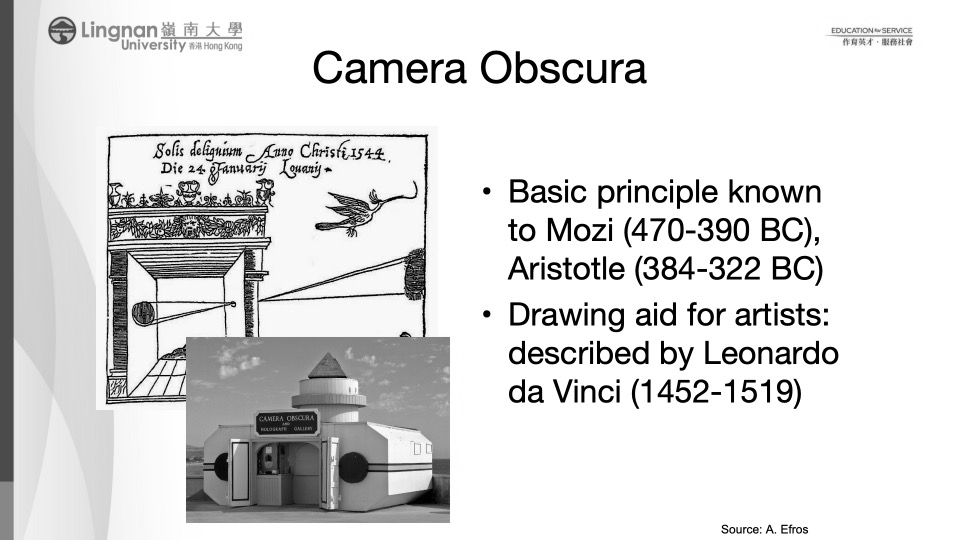

'@iinonan sy was ea\nCamera Obscura\nSel ae fee cities,\nKine ase a aah >= * Basic principle known\nPree aeaer to Mozi (470-390 BC),\ni _—F Aristotle (384-322 BC)\n= a + Drawing aid for artists:\ns fg | described by Leonardo\nAZZ gee ——~S~StsC as Vinci (14552-1519)\ne—\n\x0c'

In [47]:
img = gray
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
# Extract text from an image
pytesseract.image_to_string(img, config=custom_config)

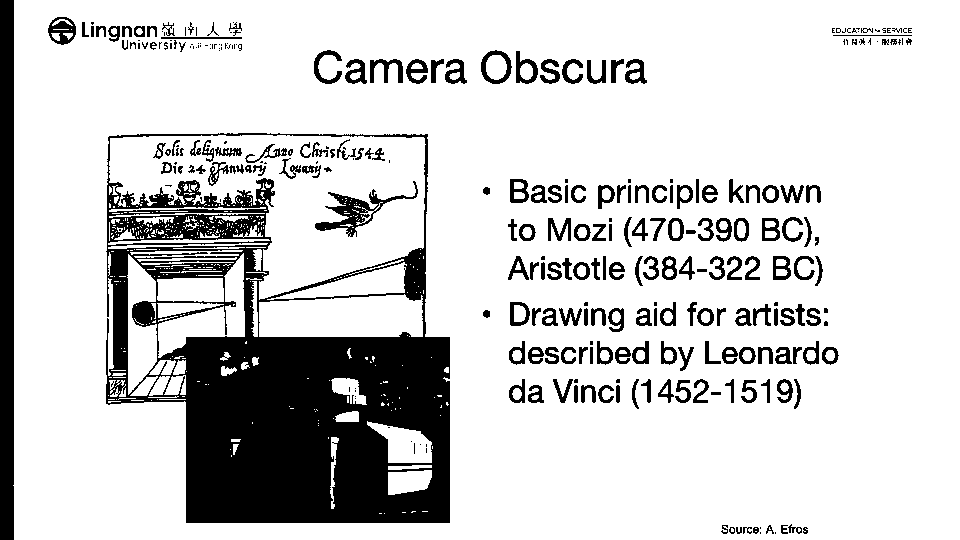

'@ingnan sas ose\nCamera Obscura\nBel sa ofp Cintas,\nae Doe iy > + Basic principle known\nease a to Mozi (470-390 BC),\nheh _——F Aristotle (84-322 BC)\nai + Drawing aid for artists:\n| fs 4 =. described by Leonardo\naa - eee = da Vinci (1452-1519)\n| =\n\x0c'

In [48]:
img = thresh
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

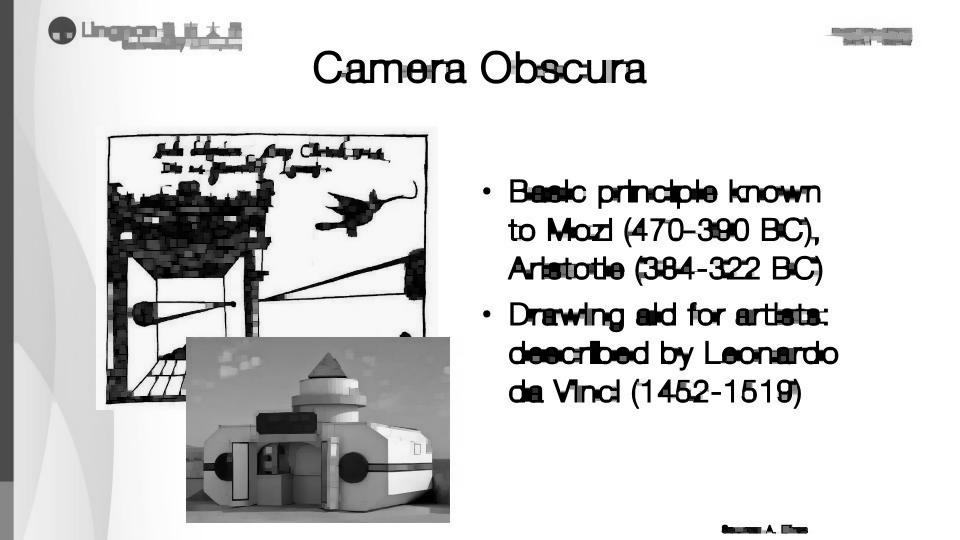

'@ rom yas ==\nCamera Obscura\nes - fy Chek\n| + Basic principle known\nre <4 to Mazi (470-380 BC),\nAristotie (384-322 BC)\nfe ewig at tr ain\npz Sse described by Leonardo\nCL) = da Vinci (1452-1519)\ni 2\nrE\n\x0c'

In [49]:
img = opening
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

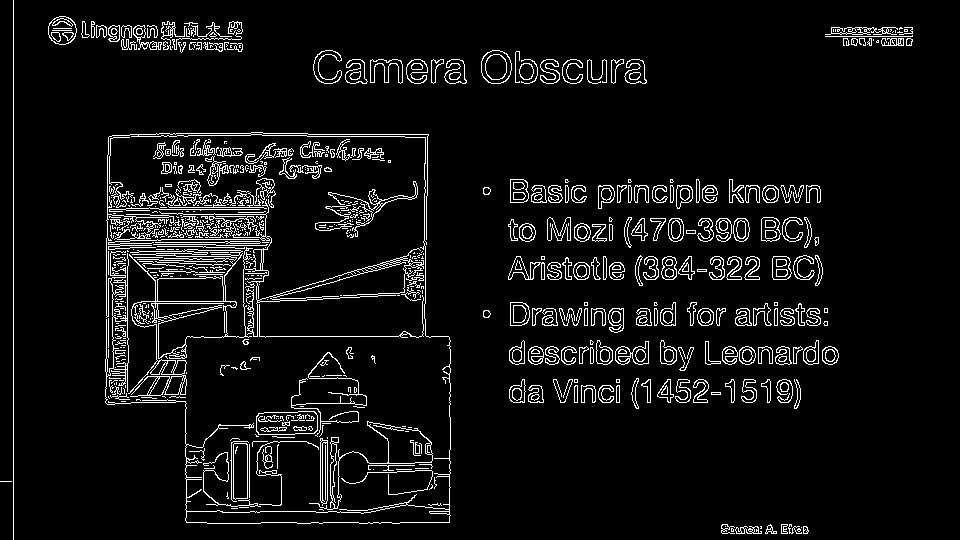

'NS oa Se\nCamera Oloscura\n\nBan a\neee en Sal ° Basic principle known\naa, eek ee en\np75 “2 — Aristotle (884-322 BC)\nIe wa i so Drawing aid for artists:\niE yan described by Leonardo\naan = da Vinei (1452-1519)\n\noF 7\n\nscoceaia Eran\n\x0c'

In [50]:
img = canny
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

# **keys**

In [51]:
import cv2
import pytesseract
from pytesseract import Output

import time

start_time = time.time()
recog_start_time = time.time()

img = cv2.imread(im1)

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

# Iterate over the rows in the dictionary and print the text and confidence
for i in range(len(d['text'])):
  print(f"Text: {d['text'][i]}, Confidence: {d['conf'][i]}")

end_time = time.time()
print(f"程序总运行时间: {(end_time - start_time) * 1000:.2f} 毫秒")

recog_end_time = time.time()
print(f"识别用时: {(recog_end_time - recog_start_time) * 1000:.2f} 毫秒")


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
Text: , Confidence: -1
Text: , Confidence: -1
Text: , Confidence: -1
Text: , Confidence: -1
Text:  , Confidence: 95
Text: , Confidence: -1
Text: , Confidence: -1
Text: , Confidence: -1
Text: @, Confidence: 73
Text: Lingnansi, Confidence: 24
Text: ie), Confidence: 22
Text: , Confidence: -1
Text: University, Confidence: 87
Text: warenatong, Confidence: 21
Text: , Confidence: -1
Text: , Confidence: -1
Text: , Confidence: -1
Text: Camera, Confidence: 96
Text: Obscura, Confidence: 96
Text: , Confidence: -1
Text: , Confidence: -1
Text: , Confidence: -1
Text: fis, Confidence: 70
Text: dl, Confidence: 67
Text: Cheri, Confidence: 53
Text: , Confidence: -1
Text: te, Confidence: 8
Text: ce, Confidence: 25
Text: sf, Confidence: 0
Text: I5, Confidence: 0
Text: 48,, Confidence: 0
Text: , Confidence: -1
Text: , Confidence: -1
Text: , Confidence: -1
Text: +, Confidence: 41

# **Getting boxes around text**

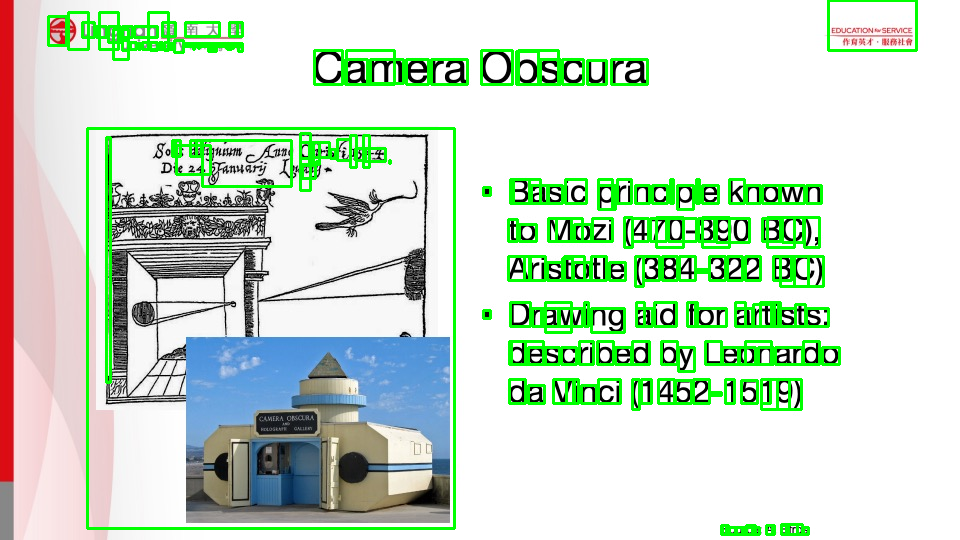

程序总运行时间: 950.59 毫秒
识别用时: 951.87 毫秒


In [52]:
import cv2
import pytesseract
import time

start_time = time.time()
recog_start_time = time.time()

img = cv2.imread(im1)

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)

end_time = time.time()
print(f"程序总运行时间: {(end_time - start_time) * 1000:.2f} 毫秒")

recog_end_time = time.time()
print(f"识别用时: {(recog_end_time - recog_start_time) * 1000:.2f} 毫秒")

# **Getting boxes around text words**

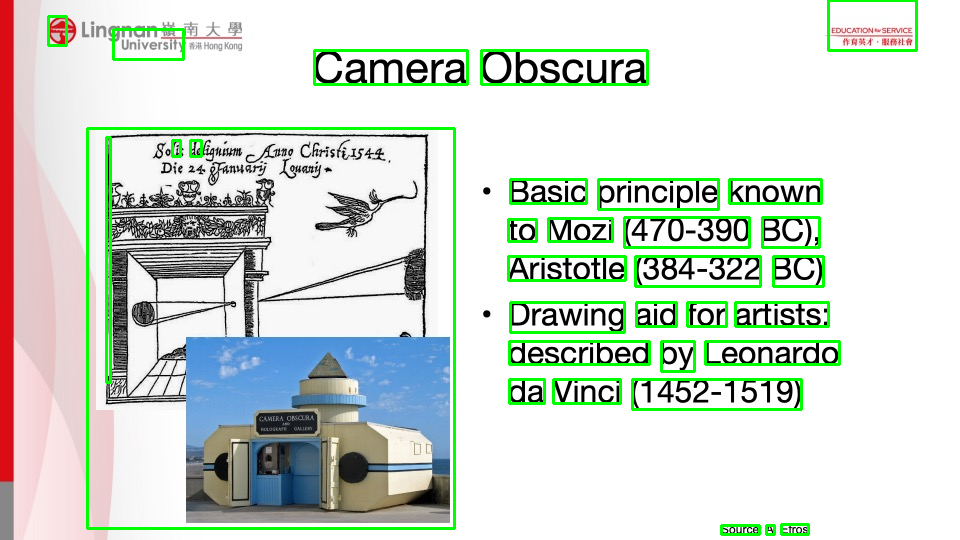

程序总运行时间: 64.62 毫秒
识别用时: 64.79 毫秒


In [53]:
import time

start_time = time.time()
recog_start_time = time.time()

img = cv2.imread(im1)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

end_time = time.time()
print(f"程序总运行时间: {(end_time - start_time) * 1000:.2f} 毫秒")

recog_end_time = time.time()
print(f"识别用时: {(recog_end_time - recog_start_time) * 1000:.2f} 毫秒")


# **Custom detection, only numbers**

In [54]:
import time

start_time = time.time()
recog_start_time = time.time()

img = cv2.imread(im1)

custom_config = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(img, config=custom_config))

end_time = time.time()
print(f"程序总运行时间: {(end_time - start_time) * 1000:.2f} 毫秒")

recog_end_time = time.time()
print(f"识别用时: {(recog_end_time - recog_start_time) * 1000:.2f} 毫秒")

.
.
470-390
41 884-322
1-
7 ..8 1452-1519
-

程序总运行时间: 981.07 毫秒
识别用时: 981.24 毫秒


# **Blacklisting characters**

In [55]:
custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'@lingnan st A memes\nCamera Obscura\nSoli ae fee cities,\nBic acto aaah >= + Basic principle known\nPaina to Mozi (/- BC),\nSi — Aristotle (- BC)\ney if-— §\n= a + Drawing aid for artists:\n: | described by Leonardo\nAZZLD .. da Vinci (-)\n-\n\x0c'

# **Script, run in loop for read pages**

In [56]:
import time

start_time = time.time()
recog_start_time = time.time()

img = cv2.imread(im1)

def read_text_from_image(image):
  """Reads text from an image file and outputs found text to text file"""
  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Perform OTSU Threshold
  ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

  dilation = cv2.dilate(thresh, rect_kernel, iterations = 1)

  contours, hierachy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  image_copy = image.copy()

  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cropped = image_copy[y : y + h, x : x + w]

    file = open("results.txt", "a")

    text = pytesseract.image_to_string(cropped)

    file.write(text)
    file.write("\n")

  file.close()

end_time = time.time()
print(f"程序总运行时间: {(end_time - start_time) * 1000:.2f} 毫秒")

recog_end_time = time.time()
print(f"识别用时: {(recog_end_time - recog_start_time) * 1000:.2f} 毫秒")

程序总运行时间: 17.46 毫秒
识别用时: 16.92 毫秒


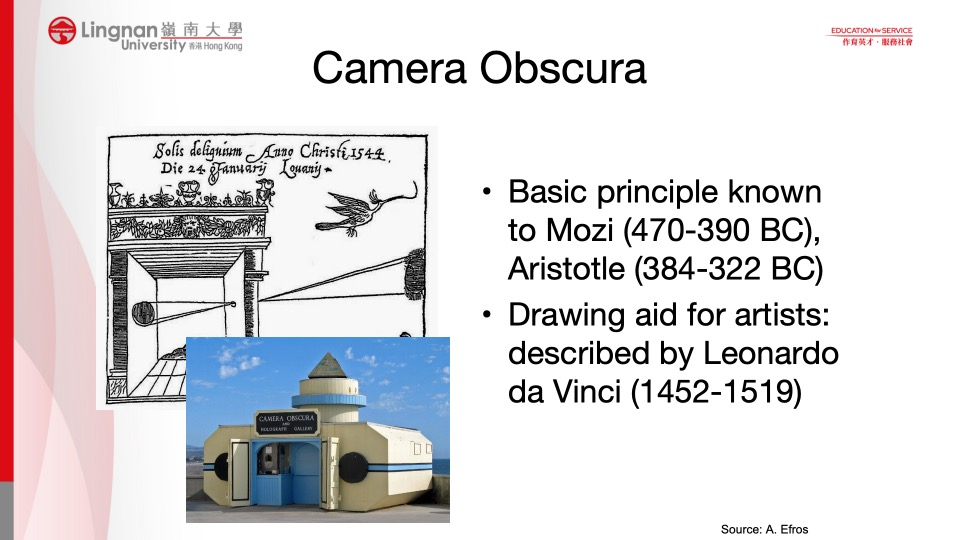





University wiHongkong

@ Lingnan si x



 



Camera Obscura



 



        



> 6 2



a eos Tgpaniy ee

ols de Aare oa fis



da Vinci (1452-1519)

described by Leonardo



Drawing aid for artists:

Aristotle (884-322 BC)

to Mozi (470-390 BC),

Basic principle known







‘Source: A. Efros





University wiHongkong

@ Lingnan si x



 



Camera Obscura



 



        



> 6 2



a eos Tgpaniy ee

ols de Aare oa fis



da Vinci (1452-1519)

described by Leonardo



Drawing aid for artists:

Aristotle (884-322 BC)

to Mozi (470-390 BC),

Basic principle known







‘Source: A. Efros

程序总运行时间: 2385.15 毫秒
识别用时: 2385.29 毫秒


In [57]:
import time

start_time = time.time()
recog_start_time = time.time()

# Print out the text identified from the image
image = cv2.imread(im1)
read_text_from_image(image)

# OCR results
cv2_imshow(image)
f = open("results.txt", "r")
lines = f.readlines()
lines.reverse()
for line in lines:
    print(line)
f.close()

end_time = time.time()
print(f"程序总运行时间: {(end_time - start_time) * 1000:.2f} 毫秒")

recog_end_time = time.time()
print(f"识别用时: {(recog_end_time - recog_start_time) * 1000:.2f} 毫秒")

# **Evaluate the accuracy of the detected text**


In [58]:
import cv2
import pytesseract
from sklearn.metrics import accuracy_score
import time

start_time = time.time()
recog_start_time = time.time()

image = cv2.imread(im1)

ocr_result = pytesseract.image_to_string(image)

ground_truth = "Lingnan University Hongkong Camera Obscura Basic principle known to Mozi (470-390 BC),Aristotle (384-322 BC) Drawing aid for artists:described by Leonardo da Vinci (1452-1519) Source A.Efros"

# Computational accuracy
def calculate_accuracy(predicted, actual):
    predicted_chars = list(predicted)
    actual_chars = list(actual)

    # Counts the number of matching characters
    matches = sum(p == a for p, a in zip(predicted_chars, actual_chars))

    # Computational accuracy
    accuracy = matches / len(actual_chars)
    return accuracy

# Acquisition accuracy
accuracy = calculate_accuracy(ocr_result.strip(), ground_truth.strip())
print(f"OCR识别结果: {ocr_result}")
print(f"真实文本: {ground_truth}")
print(f"准确率: {accuracy:.2%}")



OCR识别结果:  

@ Lingnansi ie)
University warenatong

Camera Obscura

fis dl Cheri
te ce sf I5 48,

+ Basic principle known
to Mozi (470-390 BC),
Aristotle (884-322 BC)

+ Drawing aid for artists:

described by Leonardo
da Vinci (1452-1519)

 

 

‘Source: A. Efros

真实文本: Lingnan University Hongkong Camera Obscura Basic principle known to Mozi (470-390 BC),Aristotle (384-322 BC) Drawing aid for artists:described by Leonardo da Vinci (1452-1519) Source A.Efros
准确率: 4.21%
